In [53]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from numpy.linalg import svd
from time import time
from IPython.display import clear_output
import Tools

In [54]:
from scipy.sparse.linalg import svds
data2={}

In [65]:
D=6
chi=2*D
tnormal, tsparse = [], []

for i in range(10):
    print(i)
    A = np.random.randn(chi*chi*D*D,chi*chi*D*D)
    t0 = time()
    u,s,vh = Tools.truncate3_sparse(A,k=chi)
    tsparse.append(time() - t0)
    print(tsparse[-1])
    t0 = time()
    u,s,vh = Tools.truncate3(A,k=chi)
    tnormal.append(time() - t0)
    print(tnormal[-1])
data2[D] = [np.mean(tnormal),np.mean(tsparse)]
print(i+1)
clear_output(wait=True)
print("DONE")

DONE


In [66]:
data2

{1: [0.0002368927001953125, 0.001842641830444336],
 2: [0.014800930023193359, 0.014548611640930176],
 3: [0.13805139064788818, 0.061568379402160645],
 4: [0.8446794748306274, 0.5284903049468994],
 5: [13.001580286026002, 3.615183448791504],
 6: [95.53647348880767, 13.957718348503112]}

In [67]:
Ds2, normals2, sparses2 = [], [], []
for key in list(data2):
    Ds2.append(key)
    normals2.append(data2[key][0])
    sparses2.append(data2[key][1])

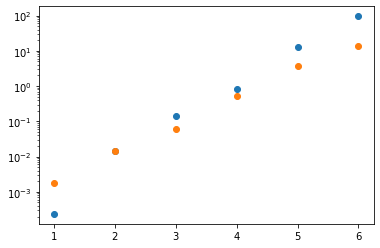

In [68]:
plt.scatter(Ds2,normals2)
plt.scatter(Ds2,sparses2)
plt.yscale('log')
plt.show()

In [70]:
for k in range(10,30):
    A = np.random.randn(20,20)
    u,s,vh = Tools.truncate3(A,k=k)
    u,s,vh = Tools.truncate3_sparse(A,k=k)
print("D")

D


In [8]:
def estimated_time(alpha, time):
    if alpha == 0:
        return "ETA: inf"
    if alpha == 1:
        return "ETA: 0"
    eta = (1 - alpha) / alpha * time + 1
    eta_h = int(eta / 3600)
    eta_m = int(eta / 60) - eta_h * 60
    eta_s = int(eta) - eta_h * 3600 - eta_m * 60
    return "ETA: {} h {} m {} s".format(eta_h, eta_m, eta_s)

In [10]:
print(estimated_time(1,20))

ETA: 0 h 0 m 1 s
